In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings('ignore')

# pd.set_option('display.max_rows', None)

In [2]:
DATASET_PATH = './csv/train.csv'
df = pd.read_csv(DATASET_PATH, sep=',')
df.head(3)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850


In [3]:
df.shape

(10000, 20)

In [4]:
df2 = df.copy()

### 1. NaN

In [5]:
df.describe()
# NaN in LifeSquare 10000 - 7887 = 2113
# NaN in Healthcare_1 10000 - 5202 = 4798

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


#### LifeSquare

Find ratio lifeSquare / Square; (by districts) \
Ratio will use for replace NaN LifeSquare

In [6]:
# Select rows with normal 'LifeSquare', where LifeSquare <= Square and 'LifeSquare' != NaN
df_ls = df[~(df['LifeSquare'].isna()) | (df['LifeSquare'] <= df['Square'])]
df_ls.shape

(7887, 20)

In [7]:
# Create ratio lifeSquare / square (for replace NaN LifeSquare) (by DistrictId)
district_sq_mean = df_ls.groupby('DistrictId').mean()['Square']
district_lsq_mean = df_ls.groupby('DistrictId').mean()['LifeSquare']

k_mean_life_square = district_lsq_mean / district_sq_mean

k_mean_life_square = pd.DataFrame(k_mean_life_square)
k_mean_life_square.rename(columns={0: 'MeanLifeSquare'}, inplace=True)
k_mean_life_square

,MeanLifeSquare
DistrictId,
0,0.598225
1,0.805322
2,0.607160
3,0.611128
4,0.660059
...,...
202,0.654800
205,0.431757
207,0.726353


In [8]:
df = df.merge(k_mean_life_square, on=['DistrictId'])

In [14]:
df.loc[(df['LifeSquare'].isna()) | (df['LifeSquare'] > df['Square']), 'LifeSquare'] = \
df.loc[(df['LifeSquare'].isna()) | (df['LifeSquare'] > df['Square']), 'Square'] * df.loc[(df['LifeSquare'].isna()) | (df['LifeSquare'] > df['Square']), 'MeanLifeSquare']

In [15]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,MeanLifeSquare
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.651594,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399,0.693021
std,4859.01902,43.587592,0.839512,21.058732,18.556441,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865,0.106874
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.431757
25%,4169.50000,20.000000,1.000000,41.774881,24.885152,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942,0.610103
50%,8394.50000,36.000000,2.000000,52.513310,34.179501,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879,0.649744
75%,12592.50000,75.000000,2.000000,65.900625,46.749366,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171,0.754906
max,16798.00000,209.000000,19.000000,641.065193,638.163193,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570,0.947827


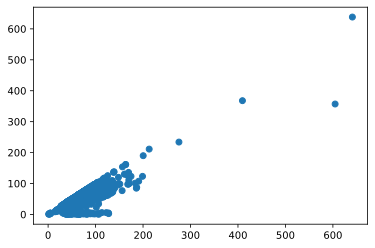

In [19]:
plt.scatter(df['Square'], df['LifeSquare'])